# 1. Daten-Aufbereitung

- Einlesen (alles in eine Datei speichern)
- Teildaten auswählen (Tage, Uhrzeiten, bestimmte Werte)
- Resampling (Stundenweise, Summenkurven,...)

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import glob

## I. Alles in eine Datei speichern


DatetimeIndex immer besser -> Timestamp verwenden! 

https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

In [57]:
pattern = 'H:/Python_Code/Plot_/*.txt'
txt_files = glob.glob(pattern)

frames = []


# use parse_dates=True for Datetime Index working in pandas
# use index_col='Timestamp' for timestamp instead of indices
for txt in txt_files:  
    df = pd.read_csv(txt,delimiter=';', skiprows=[0], names=['Timestamp', 'Epoch', 'OutsideVert', 
                                                             'OutsideHor', 'InsideCeiling', 'InsideTable', 
                                                             'InsideWork', 'InsideEye', 'new','InsideTable2', 
                                                             'InsideWork2'],index_col='Timestamp', parse_dates=True)
    frames.append(df)
    
df = pd.concat(frames)
df.to_csv("Almemo_data.csv", sep=';', encoding='utf-8')

display(df.head(2))
display(df.tail(2))

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-04-28 00:00:46,1556402446397,10,0,1,9,1,1,3,NaN,NaN
2019-04-28 00:01:56,1556402516397,10,0,1,9,2,1,3,NaN,NaN


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-05-07 11:16:25,1562318185642,24550,56950,86.47,240.1,116.6,140,134,240.14,116.55
2019-05-07 11:17:25,1562318245643,24530,55940,90.37,252.2,120.9,138,136,252.21,120.89


## II. Teildaten auswählen

- Tagesdatei
- Nur beide Außenwerte
- Tagesdatei mit out/in Verhältnis

In [60]:
df_today = df.loc["2019-05-07"]
df_today.head()

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-05-07 00:00:36,1562277636422,10,0,0.06,0,0,38,3,0,0
2019-05-07 00:01:46,1562277706419,10,0,0.06,0,0,29,3,0,0
2019-05-07 00:02:56,1562277776418,10,0,0.06,0,0,29,3,0,0
2019-05-07 00:04:06,1562277846415,10,0,0.03,0,0,39,3,0,0
2019-05-07 00:05:16,1562277916416,10,0,0.06,0,0,32,3,0,0


In [61]:
df_today_out = df_today[['OutsideVert','OutsideHor']]
df_today_out.head()

,OutsideVert,OutsideHor
Timestamp,,
2019-05-07 00:00:36,10,0
2019-05-07 00:01:46,10,0
2019-05-07 00:02:56,10,0
2019-05-07 00:04:06,10,0
2019-05-07 00:05:16,10,0


Text(0, 0.5, 'Beleuchtungsstärke [lux]')

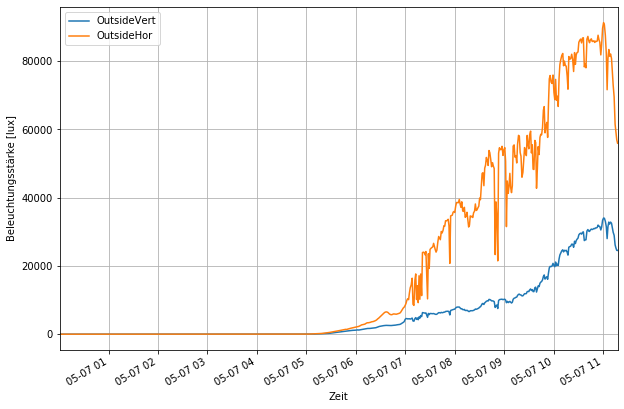

In [94]:
ax = df_today_out.plot(y=['OutsideVert','OutsideHor'],grid=True,figsize=(10,7))
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

C:\Users\zott.oliver\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Beleuchtungsstärke [lux]')

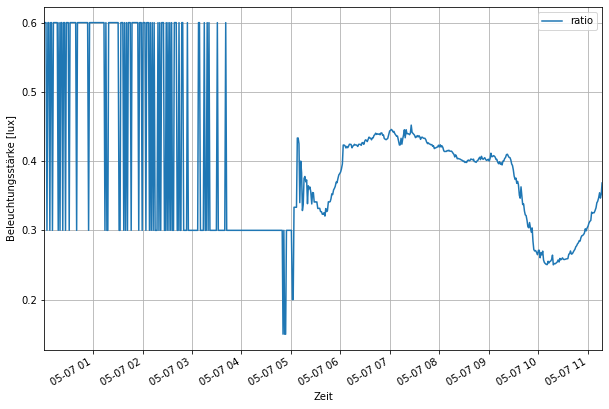

In [105]:
# Add column with ratio
df_today['ratio'] = df_today['InsideCeiling']/df_today['OutsideVert']*100

ax = df_today.plot(y='ratio',grid=True,figsize=(10,7))
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2,ratio
Timestamp,,,,,,,,,,,
2019-05-07 00:00:36,1562277636422,10,0,0.06,0,0,38,3,0,0,0.6
2019-05-07 00:01:46,1562277706419,10,0,0.06,0,0,29,3,0,0,0.6
2019-05-07 00:02:56,1562277776418,10,0,0.06,0,0,29,3,0,0,0.6
2019-05-07 00:04:06,1562277846415,10,0,0.03,0,0,39,3,0,0,0.3
2019-05-07 00:05:16,1562277916416,10,0,0.06,0,0,32,3,0,0,0.6
2019-05-07 00:06:26,1562277986415,10,0,0.06,0,0,36,3,0,0,0.6
2019-05-07 00:07:36,1562278056410,10,0,0.03,0,0,35,3,0,0,0.3
2019-05-07 00:08:36,1562278116410,10,0,0.06,0,0,37,3,0,0,0.6
2019-05-07 00:09:36,1562278176410,10,0,0.06,0,0,37,3,0,0,0.6


In [98]:
df.Timestamp.dt.time

AttributeError: 'DataFrame' object has no attribute 'Timestamp'